In [ ]:
# pip install pingouin

In [1]:
# import necessary packages

import pandas as pd
import itertools
import numpy as np
import scipy.stats
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.proportion import proportions_ztest
import time

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import networkx as nx
from random import randint

import math
# import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

In [135]:
# import necessary data

result = pd.read_csv("/Users/robinkong/codes/result.csv")
paperdata = pd.read_csv("/Users/robinkong/codes/paperdata.csv")
# cb = pd.read_csv("/Users/robinkong/codes/citationBara.csv")
# primdata = pd.read_csv("/Users/robinkong/codes/primdata.csv")
lastdata = pd.read_csv("/Users/robinkong/codes/lastdata.csv")
# pair = pd.read_csv("/Users/robinkong/codes/pairs.csv", chunksize = 1000000)
# mfpairs = pd.read_csv("/Users/robinkong/codes/mfpairs.csv")
# sim_mf = pd.read_csv("/Users/robinkong/codes/mfpairs_similarity.csv")

# Statistical Analyses

## Basic Statistics

In [136]:
print("Total papers: ", result.doi.nunique())
print("Papers with gender info: ", paperdata.doi.nunique())
print("Papers with primary gender info: ", primdata.doi.nunique())
print("Papers with last gender info: ", lastdata.doi.nunique())

Total papers:  541448
Papers with gender info:  375736
Papers with primary gender info:  273016
Papers with last gender info:  288395


In [137]:
# journal query condition

s = "PRA"

print(f"Total {s} papers: ", result[result['journal'] == s].doi.nunique())
print(f"{s} papers with gender info: ", paperdata[paperdata['journal'] == s].doi.nunique())

# df = primdata[primdata['journal'] == s]
df = lastdata[lastdata['journal'] == s]

print(f"{s} papers with last gender info: ", df.doi.nunique())
print(f"{s} papers written by last man author: ", len(df[df['gender']=='male']))
print(f"{s} papers written by last woman author: ", len(df[df['gender']=='female']))

Total PRA papers:  65170
PRA papers with gender info:  45061
PRA papers with last gender info:  35139
PRA papers written by last man author:  32034
PRA papers written by last woman author:  3105


In [138]:
# PACS query condition

pacs = '90'

print(f"Total PACS{pacs} papers: ", result[result[f'pacs{pacs}'] == 1].doi.nunique())
print(f"PACS{pacs} papers with gender info: ", paperdata[paperdata[f'pacs{pacs}'] == 1].doi.nunique())

# df = primdata[primdata[f'pacs{pacs}'] == 1]
df = lastdata[lastdata[f'pacs{pacs}'] == 1]

print(f"PACS{pacs} papers with last gender info: ", df.doi.nunique())
print(f"PACS{pacs} papers written by last man author: ", len(df[df['gender']=='male']))
print(f"PACS{pacs} papers written by last woman author: ", len(df[df['gender']=='female']))

Total PACS90 papers:  26601
PACS90 papers with gender info:  12628
PACS90 papers with last gender info:  10376
PACS90 papers written by last man author:  9330
PACS90 papers written by last woman author:  1046


### Alphabetically ordered papers and Author order analysis

In [185]:
# alphabetically ordered paper statistics

print("Total alphabetically ordered papers: ", len(result.query('is_alpha == True').drop_duplicates('doi')))

for i in range(10):
    print('')
    print(f"Total PACS {i}0 papers:", result.query(f'pacs{i}0 == 1').doi.nunique())
    print("Alphabetically ordered:",result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique())
    print("Proportion of alpha papers:", format(result.query(
        f'is_alpha == True & pacs{i}0 == 1').doi.nunique()/result.query(
        f'pacs{i}0 == 1').doi.nunique() * 100, ".2f"),'%')

Total alphabetically ordered papers:  19159

Total PACS 00 papers: 104571
Alphabetically ordered: 4141
Proportion of alpha papers: 3.96 %

Total PACS 10 papers: 55650
Alphabetically ordered: 6088
Proportion of alpha papers: 10.94 %

Total PACS 20 papers: 35026
Alphabetically ordered: 1877
Proportion of alpha papers: 5.36 %

Total PACS 30 papers: 42794
Alphabetically ordered: 1088
Proportion of alpha papers: 2.54 %

Total PACS 40 papers: 57467
Alphabetically ordered: 1558
Proportion of alpha papers: 2.71 %

Total PACS 50 papers: 12330
Alphabetically ordered: 296
Proportion of alpha papers: 2.40 %

Total PACS 60 papers: 89689
Alphabetically ordered: 1912
Proportion of alpha papers: 2.13 %

Total PACS 70 papers: 155517
Alphabetically ordered: 2686
Proportion of alpha papers: 1.73 %

Total PACS 80 papers: 48558
Alphabetically ordered: 1007
Proportion of alpha papers: 2.07 %

Total PACS 90 papers: 26601
Alphabetically ordered: 1885
Proportion of alpha papers: 7.09 %


In [140]:
# Author order categorization

# filter out alphabetically ordered papers
nonalpha = paperdata.query('is_alpha == False')

first_author = nonalpha.query('order == 1').reset_index(drop=True)
second_author = nonalpha.query('order == 2 & numAuthor != 2').reset_index(drop=True)
middle_author = nonalpha.query('order >= 3 & order != numAuthor').reset_index(drop=True)
last_author = nonalpha.query('order == numAuthor & order != 1').reset_index(drop=True)

authors = [first_author, second_author, middle_author, last_author]
authors_name = ['first', 'second', 'middle', 'last']

In [193]:
# author order statistics

# print('Total submitted positions: ', len(paperdata))
# print('Total submitted female positions: ', len(paperdata.query('gender == "female"')))
# print('Total submitted female proportion: ', len(paperdata.query('gender == "female"'))/len(paperdata))

# print('Total submitted positions: ', len(nonalpha))
# print('Total submitted female positions: ', len(nonalpha.query('gender == "female"')))
# print('Total submitted female proportion: ', len(nonalpha.query('gender == "female"'))/len(nonalpha))

for i in range(4):
    ao_m, ao_w = 0, 0
    for j in range(len(authors[i])):
        if authors[i]['gender'][j] == 'male':
            ao_m += 1
        elif authors[i]['gender'][j] == 'female':
            ao_w += 1
    print('')
    print(f"Total {authors_name[i]} authors: ", len(authors[i]))
    print(f"Total {authors_name[i]} men authors: ", ao_m)
    print(f"{authors_name[i]} men authors' proportion: ", format(
        ao_m/len(nonalpha.query('gender == "male"')), ".4f"))
    print(f"Total {authors_name[i]} women authors: ", ao_w)
    print(f"{authors_name[i]} women authors' proportion: ", format(
        ao_w/len(nonalpha.query('gender == "female"')), ".4f"))
#     print(f"Total {authors_name[i]} women proportion: ", ao_w/len(authors[i]))
    zscore, pval = proportions_ztest([ao_m, ao_w],
        [len(nonalpha.query('gender == "male"')), len(nonalpha.query('gender == "female"'))])
    print(format(zscore, ".2f"), '{:g}'.format(float('{:.3g}'.format(pval))))

#     print(proportions_ztest([ao_w, len(nonalpha.query('gender == "female"'))],
#         [len(authors[i]), len(nonalpha)]))

#     print(proportions_ztest([ao_w, len(paperdata.query('gender == "female"'))],
#         [len(authors[i]), len(paperdata)]))


Total first authors:  273016
Total first men authors:  242287
first men authors' proportion:  0.3275
Total first women authors:  30729
first women authors' proportion:  0.3438
-9.76 1.72e-22

Total second authors:  131612
Total second men authors:  116326
second men authors' proportion:  0.1572
Total second women authors:  15286
second women authors' proportion:  0.1710
-10.63 2.2e-26

Total middle authors:  198075
Total middle men authors:  174786
middle men authors' proportion:  0.2363
Total middle women authors:  23289
middle women authors' proportion:  0.2605
-16.06 4.59e-58

Total last authors:  226463
Total last men authors:  206374
last men authors' proportion:  0.2790
Total last women authors:  20089
last women authors' proportion:  0.2247
34.38 4.94e-259


### dummy analysis

In [87]:
pdata = paperdata.copy()
pdata.sort_values("id", inplace = True)

m_pdata = pdata[(pdata.gender == 'male') & (pdata.order == 1)].groupby(['year'])['year'].count()
w_pdata = pdata[(pdata.gender == 'female') & (pdata.order == 1)].groupby(['year'])['year'].count()

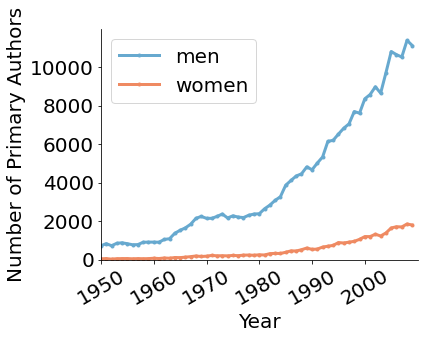

In [96]:
# Year vs. Number of Authors (Plot)

# Regular graph format throughout this paper
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Male authors
m_pdata.plot(style='.-',color='#67a9cf', lw=3)
# Female authors
w_pdata.plot(style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xticks(np.arange(1950, 2010, step=10), fontsize=20, rotation=30)
plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950, xmax=2010)
plt.ylabel('Number of Primary Authors', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/menprim_vs_womenprim.pdf")

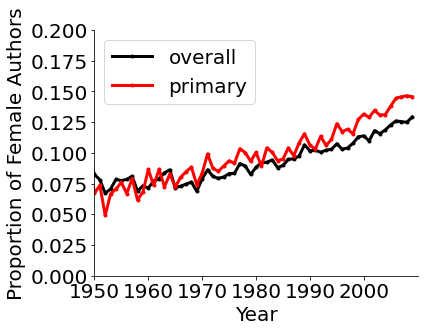

In [95]:
testdata = nonalpha.copy()
fmtdata = nonalpha.query('gender == "female"').groupby(['year'])['year'].count()

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

(fmtdata/testdata.groupby(['year'])['year'].count()).plot(style='.-', color='black', lw=3)
(w_pdata/primdata.groupby(['year'])['year'].count()).plot(style='.-', color='red', lw=3)

# plt.title('Proportion of Female Authors by Year (1950-2010)')
plt.legend(('overall', 'primary'), loc='upper left', fontsize=20)
plt.xticks(np.arange(1950, 2010, step=10), fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950, xmax=2010)
plt.ylabel('Proportion of Female Authors', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0, ymax = 0.2)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/overall_vs_primary.pdf")

### Participation Growth

In [142]:
# Observe number of authors by year, separated by gender

tdata = paperdata.copy()
tdata.sort_values("id", inplace = True)
tdata.drop_duplicates(subset = ["id", "year"],
                         keep = "first", inplace = True)

m_tdata = tdata[tdata['gender'] == 'male'].groupby(['year'])['year'].count()
w_tdata = tdata[tdata['gender'] == 'female'].groupby(['year'])['year'].count()

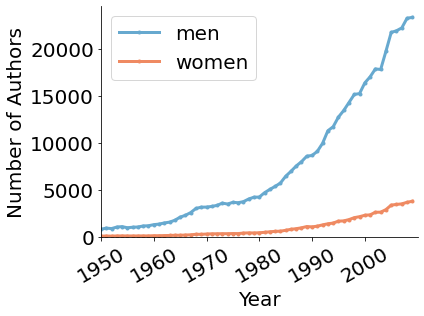

In [145]:
# Year vs. Number of Authors (Plot)

# Regular graph format throughout this paper
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Male authors
m_tdata.plot(style='.-',color='#67a9cf', lw=3)
# Female authors
w_tdata.plot(style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xticks(np.arange(1950, 2010, step=10), fontsize=20, rotation=30)
plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950, xmax=2010)
plt.ylabel('Number of Authors', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()
# fig.savefig(f"/Users/robinkong/codes/Fig_1A.pdf")

## Calculating Productivity and Dropout Rates

### Productivity Comparison

In [231]:
# Creating a DataFrame with productivity calculated
prod = paperdata.copy().groupby(['id', 'gender']).agg({'year': [min, max, 'count']})

prod['career_age'] = prod['year']['max'] - prod['year']['min']
prod['prod'] = prod['year']['count'] / (prod['career_age'])

In [242]:
# what is the ratio of men / women authors with career age of 0?

ca_zero = prod[prod['career_age'] == 0]
ca_zero.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_all_m = prod.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_all_w = prod.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

ca_zero_m = ca_zero.copy().xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
ca_zero_w = ca_zero.copy().xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_all_m = prod_all_m.groupby(['career_age'])['career_age'].count()
ca_all_w = prod_all_w.groupby(['career_age'])['career_age'].count()

ca_zero_m = ca_zero_m.groupby(['career_age'])['career_age'].count()
ca_zero_w = ca_zero_w.groupby(['career_age'])['career_age'].count()

print("Proportion of men authors with CA 0: ", format(sum(ca_zero_m)/sum(ca_all_m) * 100, ".2f"), "%")
print("Proportion of women authors with CA 0: ", format(sum(ca_zero_w)/sum(ca_all_w) * 100, ".2f"), "%")

Proportion of men authors with CA 0:  39.94 %
Proportion of women authors with CA 0:  47.55 %


In [244]:
# exclude 0 career age
prod = prod[prod['career_age'] != 0]

prod.sort_values([('year','count')], ascending=False).head()

# Separating the DataFrame by gender
prod_m = prod.xs('male', level='gender').sort_values(
    by=['prod'],ascending=False, ignore_index=True)
prod_w = prod.xs('female', level='gender').sort_values(
    by=['prod'],ascending=False)

# Career Age by gender
ca_m = prod_m.groupby(['career_age'])['career_age'].count()
ca_w = prod_w.groupby(['career_age'])['career_age'].count()

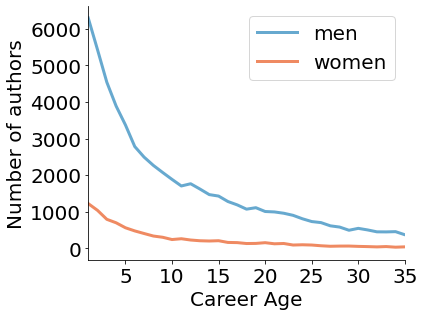

In [147]:
# Career age vs. Number of authors, separated by gender
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
ca_m.plot(color='#67a9cf', lw=3)
# Women authors
ca_w.plot(color='#ef8a62', lw=3)

plt.xticks(fontsize=20)
plt.xlim(1,35)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='upper right', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.ylabel('Number of authors', fontsize=20)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_4.pdf")

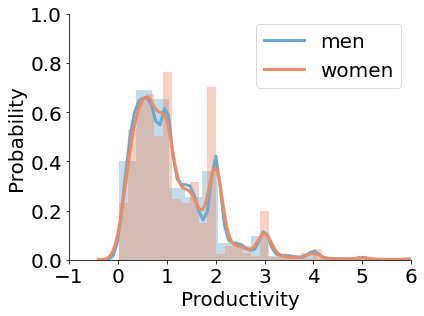

In [148]:
# Comparing PDFs

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

ax1 = sns.distplot(prod_m['prod'], ax=ax, label='male', color= '#67a9cf',kde_kws=dict(linewidth=3))
fit = ax1.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax1.legend()

ax2 = sns.distplot(prod_w['prod'], ax=ax, label='female', color= '#ef8a62',kde_kws=dict(linewidth=3))
fit = ax2.get_lines()[0].get_data() # Getting the data from the plotted line
xfit, yfit = fit[0], fit[1]
ax2.legend()

plt.legend(('men', 'women'), loc='upper right', fontsize=20)
plt.xlabel('Productivity', fontsize=20)
plt.xlim(xmin=-1, xmax=6)
plt.ylim(ymax=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Probability', fontsize=20)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_5A.pdf")

In [149]:
# creating CDF data for productivity

from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d

cdf1=np.arange(len(prod_m))/float(len(prod_m)-1)
cdf2=np.arange(len(prod_w))/float(len(prod_w)-1)

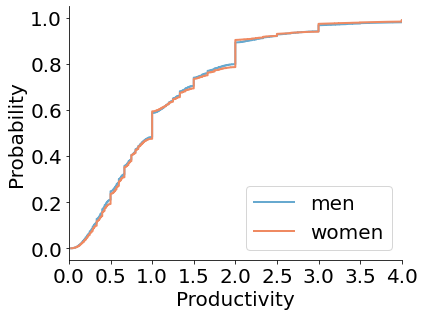

In [150]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_5B.pdf")

In [151]:
# Run K-S test to compare the productivity

print(ks_2samp(prod_m['prod'], prod_w['prod']))
print(ks_2samp(prod_m['prod'], prod_w['prod'], alternative='greater'))
print(ks_2samp(prod_m['prod'], prod_w['prod'], alternative='less'))

KstestResult(statistic=0.018202555828965516, pvalue=0.009234174631446435)
KstestResult(statistic=0.018202555828965516, pvalue=0.004611690077413463)
KstestResult(statistic=0.011233456954864107, pvalue=0.12848612339506094)


We see greater difference in productivity in favor of men authors.

In [152]:
# find out where the greatest difference in productivity occurs

def ks_2samp_x(data1, data2, alternative="two-sided"):
    data1 = np.sort(data1)
    data2 = np.sort(data2)
    n1 = data1.shape[0]
    n2 = data2.shape[0]

    data_all = np.concatenate([data1, data2])
    # using searchsorted solves equal data problem
    cdf1 = np.searchsorted(data1, data_all, side='right') / n1
    cdf2 = np.searchsorted(data2, data_all, side='right') / n2
    cddiffs = cdf1 - cdf2
    minS = np.argmin(cddiffs)   # ks_2samp uses np.min or np.max respectively 
    maxS = np.argmax(cddiffs)   # now we get instead the index in data_all
    alt2Dvalue = {'less': minS, 'greater': maxS, 'two-sided': max(minS, maxS)}
    d_arg = alt2Dvalue[alternative]
    return data_all[d_arg]

print(ks_2samp_x(prod_m['prod'], prod_w['prod'], alternative='greater'))

0.4909090909090909


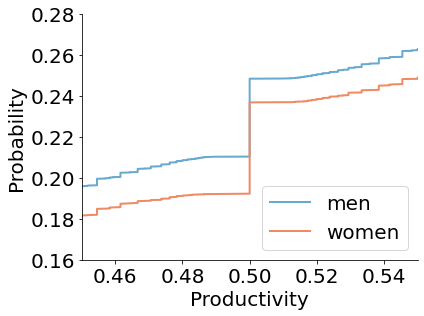

In [153]:
# Productivity CDF Plots
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(prod_m['prod'],1-cdf1, color='#67a9cf', lw=2)
# Women authors
plt.plot(prod_w['prod'],1-cdf2, color='#ef8a62', lw=2)

plt.xlabel('Productivity', fontsize=20)
plt.xticks(fontsize=20)
plt.xlim(xmin=0, xmax=4)
plt.ylabel('Probability', fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['men', 'women'], loc='lower right', fontsize=20)
plt.tight_layout()

# Use the following xlim, ylim instead for zoomed-in plot
plt.xlim(xmin=0.45, xmax=0.55)
plt.ylim(ymin=0.16, ymax=0.28)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_5C.pdf")

### Dropout Rate Comparison

In [245]:
# exclude authors who enter APS publication after 2004
# create scatterplot of dropout authors by career age

dropout = prod[prod['year']['min'] < 2004].groupby(
    ['gender', 'career_age'])['career_age'].count()

dropout_m = dropout['male'].sort_index(ascending=False)
dropout_w = dropout['female'].sort_index(ascending=False)

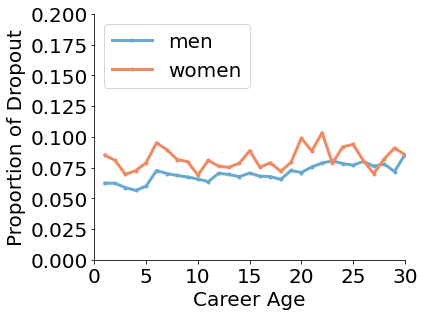

In [155]:
# Career Age vs. Proportion of Dropout (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
(dropout_m/dropout_m.cumsum()).iloc[::-1].plot(
    style='.-', color='#67a9cf', lw=3)
# Women authors
(dropout_w/dropout_w.cumsum()).iloc[::-1].plot(
    style='.-',color='#ef8a62', lw=3)

plt.legend(('men', 'women'), loc='upper left', fontsize=20)
plt.xlabel('Career Age', fontsize=20)
plt.xlim(0,30)
plt.ylabel('Proportion of Dropout', fontsize=20)
plt.ylim(0, 0.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/Fig_1C.pdf")

In [246]:
# dropout rate comparison

do_comparison = (dropout_w/dropout_w.cumsum() - dropout_m/dropout_m.cumsum())
do_comparison[:19].sort_values(ascending=False)[:5]

career_age
1    0.022787
6    0.022569
7    0.019336
5    0.019038
2    0.018583
Name: career_age, dtype: float64

### Career Age Analysis

In [156]:
# Set up DataFrames for Career Age vs. Average number of publications
# separated by gender

subdata = paperdata.copy().drop(['order','doi','numAuthor',
                                 'is_alpha','articleType','journal'],
                    axis=1).sort_values(by=['id', 'year'])
subdata["ca"] = subdata.groupby("id")["year"].transform(lambda x: x - x.min())

subdata_m = subdata[subdata['gender'] == 'male'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_w = subdata[subdata['gender'] == 'female'].drop(
    ['gender', 'year'], axis=1).groupby(['id', 'ca']).size().to_frame(
    name='count').reset_index(level='id', drop=True).reset_index()

subdata_m = subdata_m.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()
subdata_w = subdata_w.groupby("ca").agg(
    ['count', np.mean, np.std]).reset_index()

In [157]:
# Calculate standard error for the shaded area in plots

semlist1, semlist2 = [], []

for i in range(len(subdata_m)):
    semlist1.append(subdata_m["count"]['std'][i]/math.sqrt(subdata_m["count"]['count'][i]))
subdata_m['sem'] = semlist1

for i in range(len(subdata_w)):
    semlist2.append(subdata_w["count"]['std'][i]/math.sqrt(subdata_w["count"]['count'][i]))
subdata_w['sem'] = semlist2

# Append to the existing DataFrames
subdata_m = subdata_m.set_index('ca').reindex(range(
    subdata_m.ca.min(),subdata_m.ca.max()+1)).fillna(np.nan).reset_index()
subdata_w = subdata_w.set_index('ca').reindex(range(
    subdata_w.ca.min(),subdata_w.ca.max()+1)).fillna(np.nan).reset_index()

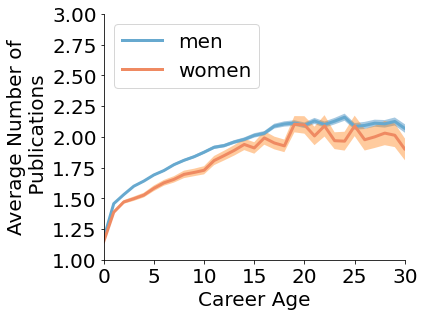

In [158]:
# Career age vs. Average number of publications (plot)

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Men authors
plt.plot(subdata_m.ca,subdata_m["count"]["mean"],"-",label="men",
         color='#67a9cf', lw=3)

# shading the SE area (man)
X  = np.linspace(min(subdata_m.ca),max(subdata_m.ca),subdata_m.ca.nunique())
plt.fill_between(X,
                 subdata_m["count"]["mean"] + subdata_m["sem"],
                 subdata_m["count"]["mean"] - subdata_m["sem"],
                 color='C0',alpha=.4,edgecolor="none")

# Women authors
plt.plot(subdata_w.ca,subdata_w["count"]["mean"],"-",label="women",
         color='#ef8a62', lw=3)

# shading the SE area (woman)
X  = np.linspace(min(subdata_w.ca),max(subdata_w.ca),subdata_w.ca.nunique())
plt.fill_between(X,
                 subdata_w["count"]["mean"] + subdata_w["sem"],
                 subdata_w["count"]["mean"] - subdata_w["sem"],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Career Age",fontsize=20)
plt.ylabel("Average Number of\n Publications",fontsize=20)
plt.xlim(xmin=0, xmax=30)
plt.ylim(ymin=1, ymax=3)
plt.legend(loc='upper left', fontsize=20)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/Fig_1B.pdf")

# Network / Similarity Analyses

## Pair matching (Pre-requisite)

In [159]:
# DataFrame: {citing_doi, citing_year, cited_doi}

# citinfo = primdata[["doi", "year"]].drop_duplicates(subset = 'doi')
citinfo = lastdata[["doi", "year"]].drop_duplicates(subset = 'doi')
cols = ['citing_doi', 'citing_year', 'cited_doi']

citinfo = citinfo.merge(cb, left_on = 'doi', right_on = 'citing_doi',
              how = 'inner').drop(['doi'], axis=1).rename(
                  {'year': 'citing_year'}, axis=1).reindex(
                      columns=cols).sort_values('cited_doi')

citinfo.head()

,citing_doi,citing_year,cited_doi
128050,10.1103/PhysRev.40.281,1932,10.1103/PhysRev.1.124
125057,10.1103/PhysRev.2.109,1913,10.1103/PhysRev.1.124
125105,10.1103/PhysRev.21.250,1923,10.1103/PhysRev.1.124
149909,10.1103/PhysRev.8.738,1916,10.1103/PhysRev.1.124
149895,10.1103/PhysRev.8.221,1916,10.1103/PhysRev.1.16


## Self-citation Analysis

In [160]:
# creating all citation dataset with gender information

self1 = citinfo.copy()
# self2 = primdata[['doi','id','gender']]
self2 = paperdata[['doi','id','gender']]

# selfinfo = self1.merge(self2, left_on='citing_doi', right_on='doi').drop(
#     ['citing_doi', 'doi'], axis=1).drop_duplicates().reset_index(drop=True)
# selfinfo.columns = ['citing_year', 'cited_doi', 'citing_id', 'citing_gender']

selfinfo = self1.merge(self2, left_on='citing_doi', right_on='doi').drop(
    ['doi'], axis=1).drop_duplicates().reset_index(drop=True)
selfinfo.columns = ['citing_doi', 'citing_year', 'cited_doi', 'citing_id', 'citing_gender']

# selfinfo = selfinfo.merge(self2, left_on='cited_doi', right_on='doi').drop(
#     ['cited_doi', 'doi', 'gender'], axis=1).drop_duplicates().reset_index(drop=True)
# selfinfo.columns = ['citing_year', 'citing_id', 'citing_gender', 'cited_id']

selfinfo = selfinfo.merge(self2, left_on='cited_doi', right_on='doi').drop(
    ['doi', 'gender'], axis=1).drop_duplicates().reset_index(drop=True)
selfinfo.columns = ['citing_doi', 'citing_year', 'cited_doi', 'citing_id', 'citing_gender', 'cited_id']

print(len(selfinfo))
selfinfo.head()

17742837


,citing_doi,citing_year,cited_doi,citing_id,citing_gender,cited_id
0,10.1103/PhysRev.40.281,1932,10.1103/PhysRev.1.124,211997,male,106864
1,10.1103/PhysRev.2.109,1913,10.1103/PhysRev.1.124,109426,male,106864
2,10.1103/PhysRev.21.250,1923,10.1103/PhysRev.1.124,212878,male,106864
3,10.1103/PhysRev.8.738,1916,10.1103/PhysRev.1.124,165511,female,106864
4,10.1103/PhysRev.40.281,1932,10.1103/PhysRev.8.738,211997,male,165511


In [161]:
# create a DataFrame with self-citing authors by gender

# all sample (population)
pop = selfinfo.copy().groupby(['citing_year'])['citing_year'].count()

# men authors
mpop = selfinfo.copy().loc[selfinfo['citing_gender'] == 'male'].groupby(
    ['citing_year'])['citing_year'].count()
# women authors
wpop = selfinfo.copy().loc[selfinfo['citing_gender'] == 'female'].groupby(
    ['citing_year'])['citing_year'].count()

# self citing authors
selfcit = selfinfo.copy().loc[selfinfo['citing_id'] == selfinfo['cited_id']].groupby(
    ['citing_year'])['citing_year'].count()

# men self citing authors
m_sc = selfinfo.copy().loc[(selfinfo['citing_id'] == selfinfo['cited_id']) &
                   (selfinfo['citing_gender'] == 'male')].groupby(
                       ['citing_year'])['citing_year'].count()
# women self citing authors
w_sc = selfinfo.copy().loc[(selfinfo['citing_id'] == selfinfo['cited_id']) & 
                     (selfinfo['citing_gender'] == 'female')].groupby(
                         ['citing_year'])['citing_year'].count()

# missing values to 0
pop[np.isnan(pop)] = 0
mpop[np.isnan(mpop)] = 0
wpop[np.isnan(wpop)] = 0
selfcit[np.isnan(selfcit)] = 0
m_sc[np.isnan(m_sc)] = 0
w_sc[np.isnan(w_sc)] = 0

In [199]:
# self-citation statistics per citation

print("Total # of citations: ", sum(pop))
print("Total # of citations by men: ", sum(mpop))
print("Proportion of men citation: ", format(sum(mpop)/sum(pop), ".4f"))
print("Total # of citations by women: ", sum(wpop))
print("Proportion of women citation: ", format(sum(wpop)/sum(pop), ".4f"))
print("")
print("Total # of self-citations: ", sum(selfcit))
print("Total # of self-citations by men: ", sum(m_sc))
print("Proportion of men self-citation: ", format(sum(m_sc)/sum(selfcit), ".4f"))
print("Total # of self-citations by women: ", sum(w_sc))
print("Proportion of women self-citation: ", format(sum(w_sc)/sum(selfcit), ".4f"))
print("")
print("Self-citation ratio: ", format(sum(selfcit)/sum(pop) * 100, ".2f"), "%")
print("Men's self-citation ratio: ", format(sum(m_sc)/sum(mpop) * 100, ".2f"), "%")
print("Women's self-citation ratio: ", format(sum(w_sc)/sum(wpop) * 100, ".2f"), "%")

Total # of citations:  17742837
Total # of citations by men:  15776512
Proportion of men citation:  0.8892
Total # of citations by women:  1966325
Proportion of women citation:  0.1108

Total # of self-citations:  730935
Total # of self-citations by men:  667483
Proportion of men self-citation:  0.9132
Total # of self-citations by women:  63452
Proportion of women self-citation:  0.0868

Self-citation ratio:  4.12 %
Men's self-citation ratio:  4.23 %
Women's self-citation ratio:  3.23 %


In [202]:
# self-citation statistics per author

observed = selfinfo.citing_id.nunique()
observed_m = selfinfo.query('citing_gender == "male"').citing_id.nunique()
observed_w = selfinfo.query('citing_gender == "female"').citing_id.nunique()

selfcit_author = selfinfo.query('citing_id == cited_id').citing_id.nunique()
selfcit_author_m = selfinfo.query(
    'citing_id == cited_id & citing_gender == "male"').citing_id.nunique()
selfcit_author_w = selfinfo.query(
    'citing_id == cited_id & citing_gender == "female"').citing_id.nunique()

print("Total # of observed authors: ", observed)
print("Total # of observed men authors: ", observed_m)
print("Proportion of observed men authors: ", format(observed_m/observed, ".4f"))
print("Total # of observed women authors: ", observed_w)
print("Proportion of observed women authors: ", format(observed_w/observed, ".4f"))
print("")
print("Total # of observed self-citing authors: ", selfcit_author)
print("Total # of observed self-citing men authors: ", selfcit_author_m)
print("Proportion of observed self-citing men authors: ", format(selfcit_author_m/selfcit_author, ".4f"))
print("Total # of observed self-citing women authors: ", selfcit_author_w)
print("Proportion of observed self-citing women authors: ", format(selfcit_author_w/selfcit_author, ".4f"))
print("")
print("Self-citation ratio (per author): ", format(selfcit_author/observed * 100, ".2f"), "%")
print("Men's self-citation ratio (per author): ", format(selfcit_author_m/observed_m * 100, ".2f"), "%")
print("Women's self-citation ratio (per author): ", format(selfcit_author_w/observed_w * 100, ".2f"), "%")

Total # of observed authors:  105468
Total # of observed men authors:  90378
Proportion of observed men authors:  0.8569
Total # of observed women authors:  15090
Proportion of observed women authors:  0.1431

Total # of observed self-citing authors:  52634
Total # of observed self-citing men authors:  46148
Proportion of observed self-citing men authors:  0.8768
Total # of observed self-citing women authors:  6486
Proportion of observed self-citing women authors:  0.1232

Self-citation ratio (per author):  49.91 %
Men's self-citation ratio (per author):  51.06 %
Women's self-citation ratio (per author):  42.98 %


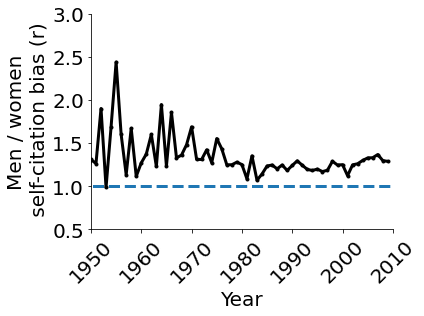

In [163]:
# calculate r-value
r1 = ((m_sc/selfcit)/(w_sc/selfcit))
r2 = ((wpop/pop)/(mpop/pop))
r = r1*r2

# create r-value plot
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

r.plot(style='.-', color='black', lw=3)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1950)
# plt.xlim(xmin=1960)
plt.xlim(xmax=2010)
plt.ylabel('Men / women\n self-citation bias (r)', fontsize=20)
# plt.ylim(ymin=0.5,ymax=3.5)
plt.ylim(ymin=0.5,ymax=3)
plt.hlines(1,xmin=1903,xmax=2010,linestyles='dashed', lw=3)

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/Fig_1D.pdf")

## Degree & PageRank Centrality Statistics

### Degree Centrality Proportion of Women Authors

In [164]:
# exclude alphabetically ordered papers
# only consider last authors
degcen = paperdata.query('is_alpha == False & order == numAuthor')

# calculate degree centrality per paper
vc = cb['cited_doi'].value_counts()
cb_sub = vc[vc.to_numpy() > 0].to_frame()

# create a DataFrame with degree centrality
cited = pd.merge(cb_sub, degcen, left_index = True, right_on = 'doi').rename(columns = {'cited_doi': 'centrality'})
cited['yeard'] = 2010-cited['year']
cited.head()

,centrality,doi,id,gender,order,numAuthor,is_alpha,year,articleType,journal,...,pacs10,pacs20,pacs30,pacs40,pacs50,pacs60,pacs70,pacs80,pacs90,yeard
14879,4100,10.1103/PhysRev.136.B864,219005,male,2,2,False,1964,article,PR,...,0,0,0,0,0,0,0,0,0,46
771070,3015,10.1103/PhysRevLett.77.3865,45056,male,3,3,False,1996,article,PRL,...,0,0,0,0,0,0,1,0,0,14
151046,2519,10.1103/PhysRevB.13.5188,142590,male,2,2,False,1976,article,PRB,...,0,0,0,0,0,0,0,0,0,34
258028,2337,10.1103/PhysRevB.54.11169,132752,male,2,2,False,1996,article,PRB,...,0,0,0,0,0,0,1,0,0,14
208120,1861,10.1103/PhysRevB.43.1993,26677,male,2,2,False,1991,article,PRB,...,0,0,0,0,0,0,1,0,0,19


In [165]:
# Top k% degree centrality basic statistics

print(f"Top 10% Centrality ({cb_sub.cited_doi[len(cb_sub)//10]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]]))
print(f"Men in Top 10% ({cb_sub.cited_doi[len(cb_sub)//10]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]) & (cited['gender'] == "male")]))
print(f"Women in Top 10% ({cb_sub.cited_doi[len(cb_sub)//10]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10]) & (cited['gender'] == "female")]))
print("")
print(f"Top 20% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]]))
print(f"Men in Top 20% ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]) & (cited['gender'] == "male")]))
print(f"Women in Top 20% ({cb_sub.cited_doi[len(cb_sub)//10 * 2]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 2]) & (cited['gender'] == "female")]))
print("")
print(f"Top 30% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]]))
print(f"Men in Top 30% ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]) & (cited['gender'] == "male")]))
print(f"Women in Top 30% ({cb_sub.cited_doi[len(cb_sub)//10 * 3]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 3]) & (cited['gender'] == "female")]))
print("")
print(f"Top 40% Centrality ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ", 
      len(cited[cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]]))
print(f"Men in Top 40% ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ",
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]) & (cited['gender'] == "male")]))
print(f"Women in Top 40% ({cb_sub.cited_doi[len(cb_sub)//10 * 4]}+): ", 
      len(cited[(cited['centrality'] >= cb_sub.cited_doi[len(cb_sub)//10 * 4]) & (cited['gender'] == "female")]))

Top 10% Centrality (25+):  24318
Men in Top 10% (25+):  22643
Women in Top 10% (25+):  1675

Top 20% Centrality (15+):  48119
Men in Top 20% (15+):  44718
Women in Top 20% (15+):  3401

Top 30% Centrality (10+):  74714
Men in Top 30% (10+):  69177
Women in Top 30% (10+):  5537

Top 40% Centrality (7+):  102471
Men in Top 40% (7+):  94629
Women in Top 40% (7+):  7842


In [166]:
def cummean(x):
    return x.cumsum() / (np.arange(1, len(x) + 1))

# def plot_topk_mean_m(x):
#     n = len(x)
#     plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='#67a9cf',
#              lw=3, label='men')

# def plot_topk_mean_w(x):
#     n = len(x)
#     plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='#ef8a62',
#              lw=3, label='women')

def plot_topk_mean_w(x):
    n = len(x)
    plt.plot(100 * (1 + np.arange(n)) / n, cummean(x[::-1]), color='black',
             lw=3)

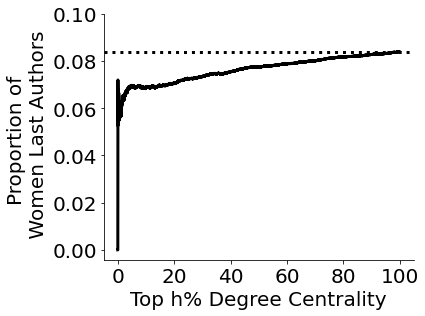

In [169]:
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plot_topk_mean_w(cited.sort_values(by='centrality')['gender'] == 'female')

plt.axhline(y=len(cited[cited['gender'] == 'female'])/len(cited),
            color='black', linestyle='dotted', lw=3)

plt.xlabel("Top h% Degree Centrality", fontsize=20)
plt.ylabel("Proportion of \n Women Last Authors", fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymax=0.1)
plt.tight_layout()

# plt.legend(loc='upper right', fontsize=20)
fig.savefig(f"/Users/robinkong/codes/Fig_3A_degree.pdf")

### PageRank Centrality Proportion of Women Authors

In [170]:
cen1 = cb.copy()
# cen2 = primdata[['doi','gender']]
cen2 = lastdata[['doi','gender']]

cen = cen1.merge(cen2, left_on='citing_doi', right_on='doi').drop('doi', axis=1).reset_index(drop=True)
cen = cen.merge(cen2, left_on='cited_doi', right_on='doi').drop('doi', axis=1).reset_index(drop=True)
cen.columns = ['citing_doi', 'cited_doi', 'citing_gender', 'cited_gender']
cen.head()

,citing_doi,cited_doi,citing_gender,cited_gender
0,10.1103/PhysRevSeriesI.11.215,10.1103/PhysRevSeriesI.1.1,male,male
1,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.1.1,male,male
2,10.1103/RevModPhys.51.863,10.1103/PhysRevSeriesI.1.1,male,male
3,10.1103/PhysRevSeriesI.4.433,10.1103/PhysRevSeriesI.1.1,male,male
4,10.1103/PhysRevSeriesI.17.267,10.1103/PhysRevSeriesI.11.215,male,male


In [182]:
# apply nx.graph to citation relationship network
Graphtype = nx.DiGraph()

C = nx.from_pandas_edgelist(cen, source='citing_doi',
                            target='cited_doi', create_using=Graphtype)
# print(nx.info(C))

In [173]:
# observe author id & gender (last author)
nodedata = lastdata[['doi','id','gender']]

In [174]:
# assign PageRank centrality to each paper
pr = nx.pagerank(C)

# create a centrality dataframe
prs = pd.DataFrame()
prs['doi'] = pr.keys()
prs['PRcen'] = pr.values()

# merge and create a dataframe: id, gender, PageRank centrality
prs_new = prs.merge(nodedata, on='doi', how='left').sort_values('PRcen', ascending=False)
prs_new.head()

,doi,PRcen,id,gender
50171,10.1103/PhysRev.136.B864,0.001486,219005,male
27917,10.1103/PhysRevLett.19.1264,0.000867,115009,male
52,10.1103/PhysRev.47.777,0.000855,47118,male
133735,10.1103/PhysRev.106.364,0.000748,175733,male
191293,10.1103/PhysRevLett.58.405,0.000650,44001,female


In [175]:
pr_age = prs_new.merge(cited, on='doi', how='inner')
pr_age = pr_age[['PRcen', 'doi', 'id_x', 'gender_x', 'yeard']]
pr_age = pr_age.rename(columns={'id_x': "id", "gender_x": "gender"}
                      ).sort_values('PRcen',ascending=False)

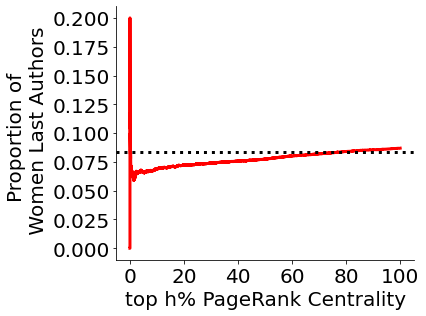

In [180]:
# Comparative graph for actual female proportion vs. expected female proportion

prs_gender = prs_new['gender'].to_numpy()
cumulate_prs_gender = np.cumsum(prs_gender == "female")

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.plot((np.arange(len(prs_new))*100)/len(prs_new),
         cumulate_prs_gender/np.arange(1, len(prs_new)+1), color='red', lw=3)
# plt.axhline(y=0.08274119036274367, color='black', linestyle='dotted', lw=3)
plt.axhline(y=len(cited[cited['gender'] == 'female'])/len(cited),
            color='black', linestyle='dotted', lw=3)

plt.xlabel("top h% PageRank Centrality", fontsize=20)
plt.ylabel("Proportion of \n Women Last Authors", fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymax=0.21)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/Fig_3A_PageRank.pdf")

## Similarity Validation Statistics

In [76]:
# filter conditions

# sdoi = primdata[primdata['journal'] == "PRL"].doi
# sdoi = primdata[primdata['pacs90'] == 1].doi

df = sim_mf.copy()

# df = df[df['paper1'].isin(sdoi)]
# df = df[df['paper2'].isin(sdoi)].reset_index(drop=True)

In [ ]:
# filter year constraints

N = 3

df = df[df['yeard'] >= -N]
df = df[df['yeard'] <= N].reset_index(drop=True)

In [77]:
p = 0.001
df_vld = df[df['qval'] < p]

print("N: ", len(df))
print("M: ", len(df_vld))
print("M/N: ", len(df_vld)/len(df))

N:  2730100
M:  410418
M/N:  0.15033075711512398


In [78]:
# getting mlist and fmlist (count per gender)

mlist = []
fmlist = []

for i in tqdm(range(len(df_vld))):
    if df_vld['gender1'][i] == 'male':
        mlist.append(df_vld['count1'][i])
        fmlist.append(df_vld['count2'][i])
    else:
        mlist.append(df_vld['count2'][i])
        fmlist.append(df_vld['count1'][i])

# Find z-scores (for p-values)
ztest(mlist, fmlist, value=0)

100%|██████████| 410418/410418 [00:04<00:00, 95449.02it/s]


(19.150151095942956, 9.65063481804804e-82)

In [ ]:
# Find z-scores (for p-values)
print(ztest(mlist, fmlist, value=0))
print('')

# Find effect size
print(pg.compute_effsize(mlist, fmlist, paired=True, eftype='hedges'))

## Centrality Difference Trend by Year (m-f pairs)

In [2]:
sim_mf = pd.read_csv("/Users/robinkong/codes/mfpairs_similarity.csv")
sim_mf.head()

,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,count1,count2,countd,yeard
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,4,-1.117244e-10,1,1,0,1
1,10.1103/PhysRevB.73.075112,10.1103/PhysRevB.74.045113,female,male,2006,2006,4,-1.117173e-10,9,2,-7,0
2,10.1103/PhysRev.88.1109,10.1103/RevModPhys.24.321,male,female,1952,1952,2,-9.355250e-11,45,79,-34,0
3,10.1103/PhysRevE.70.011103,10.1103/PhysRevE.70.056128,male,female,2004,2004,3,-8.545054e-11,1,1,0,0
4,10.1103/PhysRevB.76.174508,10.1103/PhysRevLett.99.087001,male,female,2007,2007,3,-8.545054e-11,1,3,-2,0


In [3]:
mfs = sim_mf[sim_mf['yeard'] <= 3]
mfs = mfs[mfs['yeard'] >= -3].reset_index(drop=True)

lateryear = []

for i in tqdm(range(len(mfs))):
    lateryear.append(max(mfs['year1'][i], mfs['year2'][i]))

mfs['lateryear'] = lateryear

mfs.head()

100%|██████████| 5611686/5611686 [00:36<00:00, 153994.48it/s]


,paper1,paper2,gender1,gender2,year1,year2,keyval,qval,count1,count2,countd,yeard,lateryear
0,10.1103/PhysRevB.74.035411,10.1103/PhysRevB.75.205440,female,male,2006,2007,4,-1.117244e-10,1,1,0,1,2007
1,10.1103/PhysRevB.73.075112,10.1103/PhysRevB.74.045113,female,male,2006,2006,4,-1.117173e-10,9,2,-7,0,2006
2,10.1103/PhysRev.88.1109,10.1103/RevModPhys.24.321,male,female,1952,1952,2,-9.355250e-11,45,79,-34,0,1952
3,10.1103/PhysRevE.70.011103,10.1103/PhysRevE.70.056128,male,female,2004,2004,3,-8.545054e-11,1,1,0,0,2004
4,10.1103/PhysRevB.76.174508,10.1103/PhysRevLett.99.087001,male,female,2007,2007,3,-8.545054e-11,1,3,-2,0,2007


In [91]:
p = 0.001

simp = mfs[mfs['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp)/len(mfs))

simp_mw = simp[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

0.10213864425058708


In [6]:
simp_mw_yr = simp_mw.groupby(['lateryear'])['lateryear'].count()
simp_mw_yr.head()

lateryear
1903    3
1916    1
1918    1
1921    1
1923    2
Name: lateryear, dtype: int64

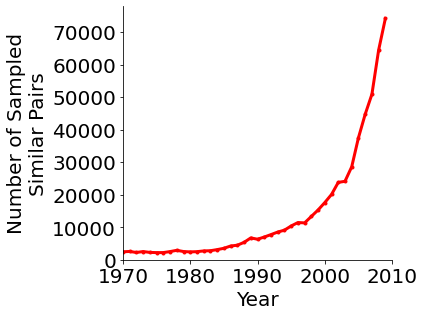

In [7]:
fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

simp_mw_yr.plot(style='.-',color='red', lw=3)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1970, xmax=2010)
plt.xticks(np.arange(1970, 2011, 10), fontsize=20)
plt.ylabel('Number of Sampled\nSimilar Pairs', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_7.pdf")

In [12]:
simp_mw_yr = pd.DataFrame({'year':simp_mw_yr.index, 'count':simp_mw_yr.values})

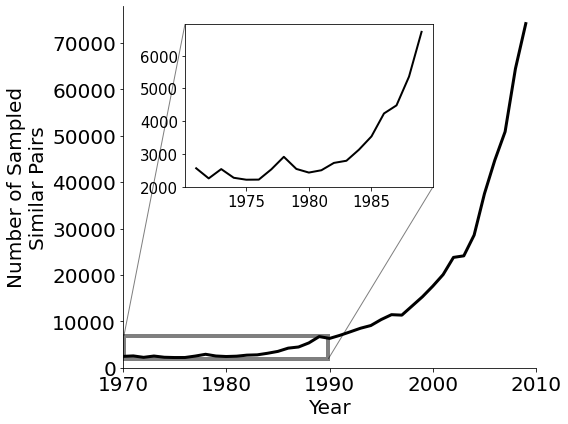

In [30]:
fig, ax = plt.subplots(figsize=(8,6))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.plot(simp_mw_yr['year'], simp_mw_yr['count'], color='black', lw=3)

inset_ax = ax.inset_axes([0.15, 0.5, 0.6, 0.45])
inset_ax.plot(simp_mw_yr['year'][52:71], simp_mw_yr['count'][52:71], color='black', lw=2)
inset_ax.tick_params(labelsize=15)

plt.xlabel('Year', fontsize=20)
plt.xlim(xmin=1970, xmax=2010)
plt.xticks(np.arange(1970, 2011, 10), fontsize=20)
plt.ylabel('Number of Sampled\nSimilar Pairs', fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0)
ax.indicate_inset_zoom(inset_ax, edgecolor="black", linewidth = 4)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/simpairs_zoomed.pdf")

## Comparing similar m-m pairs and m-w pairs

### Percentile plots of centrality difference by year

In [22]:
# man-man pairs

sim_mm = pd.read_csv("/Users/robinkong/codes/mmpairs_similarity.csv")

# apply year restriction

mms = sim_mm[sim_mm['yeard'] <= 3]
mms = mms[mms['yeard'] >= -3].reset_index(drop=True)

# label the publication year of pairs as the publication year of a latter one

lateryear = []

for i in tqdm(range(len(mms))):
    lateryear.append(max(mms['year1'][i], mms['year2'][i]))

mms['lateryear'] = lateryear

# apply similarity threshold

p = 0.001

simp_mm = mms[mms['qval'] < p].sort_values('countd').reset_index(drop=True)
print(len(simp_mm)/len(mms))

simp_mm = simp_mm[['lateryear', 'countd']].sort_values(by=['lateryear', 'countd'])

100%|██████████| 19193545/19193545 [02:12<00:00, 144931.66it/s]


0.11612544738348231


In [23]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [24]:
# find the percentile statistics for m-w pairs

paired_mf = simp_mw.groupby('lateryear').agg([np.mean, percentile(10), percentile(20),
                                      percentile(30), percentile(40), np.median,
                                      percentile(60), percentile(70), percentile(80),
                                      percentile(90)]).reset_index()

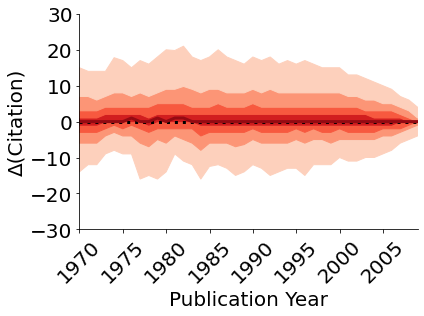

In [87]:
# m-w pair percentile plot

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

cm = sns.color_palette("Reds",10)

plt.axhline(y=0, color='black', linestyle='dotted', lw=3)
plt.plot(paired_mf.lateryear,paired_mf.countd["median"],"-",label="M-F Median", color=cm[9], lw=3)

plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_10"],
                 paired_mf.countd["percentile_20"], color=cm[1])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_20"],
                 paired_mf.countd["percentile_30"], color=cm[3])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_30"],
                 paired_mf.countd["percentile_40"], color=cm[5])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_40"],
                 paired_mf.countd["median"], color=cm[7])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["median"],
                 paired_mf.countd["percentile_60"], color=cm[7])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_60"],
                 paired_mf.countd["percentile_70"], color=cm[5])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_70"],
                 paired_mf.countd["percentile_80"], color=cm[3])
plt.fill_between(paired_mf.lateryear, paired_mf.countd["percentile_80"],
                 paired_mf.countd["percentile_90"], color=cm[1])

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Publication Year", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)

plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-30, ymax=30)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mfpair_pp.pdf")

In [27]:
ref = simp_mw.lateryear.unique()
numlist = []

mm_centrality = pd.DataFrame(columns=['lateryear'])

for num in ref:
    numlist.append(num)
mm_centrality['lateryear'] = numlist

# take the average of 100 random m-m pair samples per year and calculate the centrality difference

for k in tqdm(range(100)):
    df1 = pd.DataFrame(columns=['lateryear', 'countd'])
    vlist = []

    for i in range(len(ref)):
        df2 = simp_mm[simp_mm['lateryear'] == ref[i]].sample(
            simp_mwsimp.lateryear.value_counts().sort_index().iloc[i], replace=True)
        df1 = pd.concat([df1,df2])
    
    for j in range(len(df1)):
        if randint(0,1) == 0:
            vlist.append(df1.countd.iloc[j])
        else:
            vlist.append(df1.countd.iloc[j] * -1)
    
    df1['value'] = vlist
    df1 = df1.groupby("lateryear").agg([np.mean]).reset_index().drop(['lateryear'], axis=1)

    mm_centrality = pd.concat([mm_centrality, df1], axis=1)

mm_centrality.head()

,lateryear,"(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)",...,"(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)","(value, mean)"
0,1903,0.0,0.666667,0.666667,0.0,-0.666667,-0.666667,0.0,0.0,0.0,...,0.0,-0.666667,0.0,0.0,0.666667,-1.333333,-0.666667,0.0,-0.666667,0.0
1,1916,-6.0,1.000000,1.000000,0.0,5.000000,-5.000000,-1.0,-9.0,0.0,...,0.0,0.000000,1.0,-9.0,0.000000,6.000000,-6.000000,-1.0,-6.000000,-9.0
2,1918,0.0,-2.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,1.0,...,-14.0,1.000000,0.0,-14.0,-2.000000,-2.000000,-1.000000,-1.0,-1.000000,-2.0
3,1921,-1.0,3.000000,3.000000,-1.0,-3.000000,-2.000000,-1.0,-2.0,-3.0,...,0.0,1.000000,0.0,2.0,1.000000,2.000000,-2.000000,0.0,1.000000,1.0
4,1923,-0.5,1.000000,-1.500000,1.5,4.500000,-6.500000,0.0,6.5,-0.5,...,0.5,5.000000,-5.5,1.5,0.500000,-4.500000,-5.500000,1.0,-0.500000,5.0


In [78]:
# record the percentiles of the average statistics of 100 m-m pairs per year

paired_mm = mm_centrality.copy()

list_1, list_2, list_3, list_4, list_5, list_6, list_7, list_8, list_9 = [], [], [], [], [], [], [], [], []

for i in range(len(paired_mm)):
    list_1.append(np.percentile(paired_mm.iloc[i,1:],10))
    list_2.append(np.percentile(paired_mm.iloc[i,1:],20))
    list_3.append(np.percentile(paired_mm.iloc[i,1:],30))
    list_4.append(np.percentile(paired_mm.iloc[i,1:],40))
    list_5.append(np.median(paired_mm.iloc[i,1:]))
    list_6.append(np.percentile(paired_mm.iloc[i,1:],60))
    list_7.append(np.percentile(paired_mm.iloc[i,1:],70))
    list_8.append(np.percentile(paired_mm.iloc[i,1:],80))
    list_9.append(np.percentile(paired_mm.iloc[i,1:],90))

paired_mm['percentile_10'] = list_1
paired_mm['percentile_20'] = list_2
paired_mm['percentile_30'] = list_3
paired_mm['percentile_40'] = list_4
paired_mm['median'] = list_5
paired_mm['percentile_60'] = list_6
paired_mm['percentile_70'] = list_7
paired_mm['percentile_80'] = list_8
paired_mm['percentile_90'] = list_9

paired_mm = paired_mm[['lateryear', 'percentile_10','percentile_20','percentile_30',
                       'percentile_40','median','percentile_60','percentile_70',
                       'percentile_80','percentile_90']]

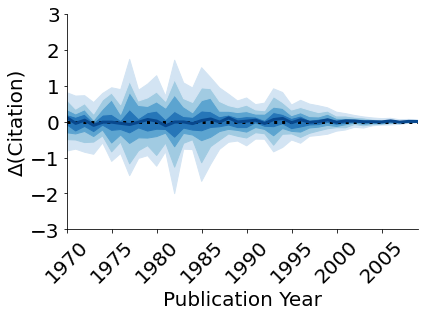

In [89]:
# m-m averaged percentile plot

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

cm2 = sns.color_palette("Blues",10)

plt.axhline(y=0, color='black', linestyle='dotted', lw=3)
plt.plot(paired_mm.lateryear,paired_mm["median"],"-",label="M-M Median", color=cm2[9], lw=3)

plt.fill_between(paired_mm.lateryear, paired_mm["percentile_10"],
                 paired_mm["percentile_20"], color=cm2[1])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_20"],
                 paired_mm["percentile_30"], color=cm2[3])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_30"],
                 paired_mm["percentile_40"], color=cm2[5])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_40"],
                 paired_mm["median"], color=cm2[7])
plt.fill_between(paired_mm.lateryear, paired_mm["median"],
                 paired_mm["percentile_60"], color=cm2[7])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_60"],
                 paired_mm["percentile_70"], color=cm2[5])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_70"],
                 paired_mm["percentile_80"], color=cm2[3])
plt.fill_between(paired_mm.lateryear, paired_mm["percentile_80"],
                 paired_mm["percentile_90"], color=cm2[1])

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Publication Year", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)

plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-3, ymax=3)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mmpair_pp.pdf")

### Centrality differences of similar m-m & m-f pairs by year

In [28]:
# mm_ms is the DataFrame for the difference plot (M-M pairs)
mm_ms = mm_centrality.copy()

# Retrieving the list of means and SDs
meanlist = mm_ms.iloc[:,1:].mean(axis=1).tolist()
sdlist = mm_ms.iloc[:,1:].std(axis=1).tolist()

# Appending to the DataFrame
mm_ms['avg'] = meanlist
mm_ms['sd'] = sdlist
mm_ms = mm_ms[['lateryear','avg','sd']]

In [29]:
# mf_ms is the DataFrame for the difference plot (M-F pairs)
mf_ms = simp_mw.groupby("lateryear").agg(['count', np.mean, np.std]).reset_index()

# Retrieve a standard error list for M-F pairs
semlist = []

for i in range(len(mf_ms)):
    semlist.append(mf_ms.countd['std'][i]/math.sqrt(mf_ms.countd['count'][i]))

mf_ms['sem'] = semlist

In [30]:
# remove sparse year data (not used in visualization regardlessly)

mm_ms = mm_ms.loc[4:].reset_index(drop=True)
mf_ms = mf_ms.loc[4:].reset_index(drop=True)

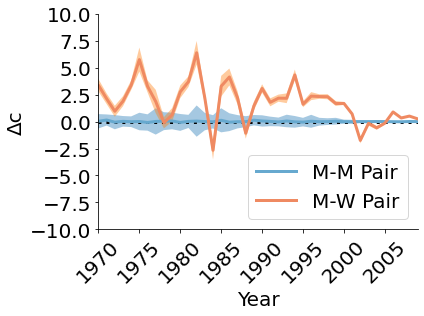

In [31]:
# Creating a year vs. centrality difference plot, separated by gender

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Equilibrium line
plt.axhline(y=0, color='black', linestyle='dotted', lw=3)

# Plotting M-M pairs
plt.plot(mm_ms.lateryear,mm_ms.avg,"-",label="M-M Pair",
         color='#67a9cf', lw=3)

# shading the SD area (M-M)
X  = np.linspace(min(mm_ms.lateryear),max(mm_ms.lateryear),mm_ms.lateryear.nunique())
plt.fill_between(X,
                 mm_ms.avg + mm_ms.sd,
                 mm_ms.avg - mm_ms.sd,
                 color='C0',alpha=.4,edgecolor="none")

# Plotting M-F pairs
plt.plot(mf_ms.lateryear,mf_ms.countd['mean'],"-",label="M-W Pair",
         color='#ef8a62', lw=3)

# shading the SE area (M-F)
plt.fill_between(X,
                 mf_ms.countd['mean'] + mf_ms['sem'],
                 mf_ms.countd['mean'] - mf_ms['sem'],
                 color='C1',alpha=.4,edgecolor="none")

plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("\u0394c",fontsize=20)
plt.xlim(xmin=1970, xmax=2009)
plt.ylim(ymin=-10, ymax=10)

plt.legend(loc='lower right', fontsize=20)

plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/mm_mf_cdiff.pdf")

### Year difference vs. Centrality difference visualization by PACS

In [127]:
# Separate into 4 quadrants depending on count difference and year difference

N = 9  # subfield
sdoi = primdata[primdata[f'pacs{N}0'] == 1].doi

cy_mw = sim_mf.copy()
print(len(cy_mw))
cy_mw = cy_mw[cy_mw['qval'] < p]  # apply threshold
print(len(cy_mw))
cy_mw = cy_mw[(cy_mw.paper1.isin(sdoi)) & (cy_mw.paper2.isin(sdoi))
             ].reset_index(drop=True)  # apply subfield
print(len(cy_mw))

quad1 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard > 0)]
quad2 = cy_mw[(cy_mw.countd > 0) & (cy_mw.yeard < 0)]
quad3 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard < 0)]
quad4 = cy_mw[(cy_mw.countd < 0) & (cy_mw.yeard > 0)]

14490273
1057275
28262


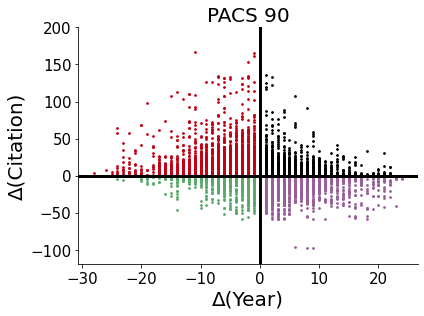

In [129]:
# build scatterplots

fig, ax = plt.subplots(figsize=(6,4.5))
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Create year difference vs. count difference scatterplot
plt.title(f"PACS {N}0", fontsize=20)
plt.scatter(quad1.yeard, quad1.countd, s=3, c='#000000')
plt.scatter(quad2.yeard, quad2.countd, s=3, c='#c20114')
plt.scatter(quad3.yeard, quad3.countd, s=3, c='#59a96a')
plt.scatter(quad4.yeard, quad4.countd, s=3, c='#985f99')
plt.axhline(y=0, linewidth=0.5, c='k', lw=3)
plt.axvline(x=0, linewidth=0.5, c='k', lw=3)
plt.xlabel("\u0394(Year)", fontsize=20)
plt.ylabel("\u0394(Citation)", fontsize=20)
plt.ylim(ymax=200)
# plt.xlim(xmin=-25, xmax=25)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
fig.savefig(f"/Users/robinkong/codes/SI_Fig_6_PACS{N}0.pdf")